# $\color{black}{\text{Kapittel 1 - Grunnleggende regning/prosentregning/vekstfaktor}}$

In [ ]:
# 1 Grunnleggende regning: 1.4 Brøk
# Omgjøringskalkulator mellom desimaltall, brøk og prosent
from decimal import Decimal, getcontext
from math import gcd

getcontext().prec = 10  # Sett presisjon for desimaler

def hovedmeny():
    print("Velkommen til omgjøringskalkulator mellom desimaltall, brøk og prosent ")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva vil du beregne?")
    print("1. Prosent til desimaltall og brøk")
    print("2. Brøk til desimaltall og prosent")
    print("3. Desimaltall til brøk og prosent")

def beregn_prosentandel(delen: float, hele: float) -> float:
    if hele == 0:
        raise ValueError("Hele kan ikke være null.")
    return (delen / hele) * 100

def decimal_to_fraction_and_percent(digits: str):
    try:
        n = Decimal(digits)
    except InvalidOperation:
        print("Ugyldig desimaltall.")
        return

    exponent = len(digits.split('.')[1]) if '.' in digits else 0
    numerator = int(n * 10**exponent)
    denominator = 10**exponent
    percent = float(n * 100)
    factor = gcd(numerator, denominator)
    num = numerator // factor
    den = denominator // factor

    print(f"Desimaltallet er {round(n, 3)}")
    print(f"Brøken er {num} / {den}")
    print(f"Prosenten er {round(percent, 3)}%\n")

def percent_to_decimal_and_fraction(percent: float):
    decimal = percent / 100
    digits = str(decimal)
    decimal_to_fraction_and_percent(digits)

def fraction_to_decimal_and_percent(numerator: int, denominator: int):
    if denominator == 0:
        print("Nevneren kan ikke være null.")
        return
    decimal = Decimal(numerator) / Decimal(denominator)
    percent = float(decimal * 100)

    print(f"Desimaltallet er {round(decimal, 3)}")
    print(f"Prosenten er {round(percent, 3)}%\n")

def main():
    while True:
        hovedmeny()
        choice = input("Velg et alternativ (1/2/3): ").strip().lower()
        if choice == 'q':
            print("Programmet avsluttes.")
            break
        elif choice == '1':
            percent = float(input("Skriv inn prosentverdien: "))
            percent_to_decimal_and_fraction(percent)
        elif choice == '2':
            numerator = int(input("Skriv inn telleren til brøken, altså det øverste tallet: "))
            denominator = int(input("Skriv inn nevneren til brøken, altså det nederste tallet: "))
            fraction_to_decimal_and_percent(numerator, denominator)
        elif choice == '3':
            digits = input("Skriv inn ett desimaltall, husk punktum, for å konvertere til brøk og prosent: ")
            decimal_to_fraction_and_percent(digits)
        else:
            print("Ugyldig valg. Vennligst prøv igjen.")
        
        restart = input("Vil du starte på nytt? (ja/nei): ").strip().lower()
        if restart == 'q':
            print("Programmet avsluttes.")
            break
        elif restart != 'ja':
            break

if __name__ == "__main__":
    main()

In [1]:
# 1 Grunnleggende regning: 1.6 Prosent
# 1.6 Prosent Finn % av ett tall. Formel: p % av ett tall = p/100 * tallet
while True:
    user_input = input("Skriv inn prosent (eller 'q' for å avslutte): ")
    if user_input.lower() == 'q':
        print("Avslutter programmet.")
        break
    try:
        prosent = float(user_input)
        hele_tallet = float(input("Skriv inn hele tallet: "))
        prosentdelen = prosent / 100 * hele_tallet
        print(f"{prosent}% av {hele_tallet} er {round(prosentdelen, 2)}")
    except ValueError:
        print("Ugyldig input. Vennligst skriv inn tallverdier.")

Skriv inn prosent (eller 'q' for å avslutte):  14
Skriv inn hele tallet:  350


14.0% av 350.0 er 49.0


Skriv inn prosent (eller 'q' for å avslutte):  q


Avslutter programmet.


In [ ]:
# 1 Grunnleggende regning: 1.6 Prosent
# Hvor mange prosent delen av ett tall er av det hele tallet er, feks 10 er ...% av 30
from dataclasses import dataclass

@dataclass
class Prosentandel:
    delen: float
    hele: float

    def beregn(self) -> float:
        if self.hele == 0:
            raise ValueError("Hele kan ikke være null.")
        return (self.delen / self.hele) * 100

def main():
    print("Velkommen til programmet som regner ut hvor mange prosent ett tall er av ett annet tall")
    print("Trykk 'q' når som helst for å avslutte programmet.\n")

    while True:
        delen_input = input("Skriv inn delen av tallet (eller 'q' for å avslutte): ").strip().lower()
        if delen_input == 'q':
            print("Programmet avsluttes.")
            break

        hele_input = input("Skriv inn det hele tallet (eller 'q' for å avslutte): ").strip().lower()
        if hele_input == 'q':
            print("Programmet avsluttes.")
            break

        try:
            delen = float(delen_input)
            hele = float(hele_input)
            prosentandel = Prosentandel(delen=delen, hele=hele)
            prosent = prosentandel.beregn()
            print(f"{prosentandel.delen} er {prosent:.2f}% av {prosentandel.hele}.")
        except ValueError as e:
            print(e)
        except Exception as e:
            print(f"Ugyldig input: {e}")

if __name__ == "__main__":
    main()

In [ ]:
# 1 Grunnleggende regning: 1.6 Prosent
# Regel 1. Del av tallet = (Hele tallet ∙ Prosenten) / 100
def beregn_hele_tallet(prosent, kroner):
    return kroner * 100 / prosent

def beregn_prosent(hele_tallet, kroner):
    return (kroner / hele_tallet) * 100

def beregn_del_av_tallet(hele_tallet, prosent):
    return hele_tallet * prosent / 100

def hovedprogram():
    print("Velkommen til kalkulatoren for: Del av tallet = (Hele tallet ∙ Prosenten) / 100")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva ønsker du å beregne?")
    
    print("1: Hele tallet")
    print("2: Prosent")
    print("3: Del av tallet")
    
    while True:
        valg = input("Skriv inn nummeret på det du ønsker å beregne (1, 2, eller 3): ")
        
        if valg.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break
        
        if valg == "1":
            try:
                prosent = float(input("Skriv inn prosentverdien: "))
                kroner = float(input("Skriv inn del av hele tallet: "))
                hele_tallet = beregn_hele_tallet(prosent, kroner)
                print(f"Hele tallet er: {hele_tallet:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "2":
            try:
                hele_tallet = float(input("Skriv inn hele tallet: "))
                kroner = float(input("Skriv inn del av tallet: "))
                prosent = beregn_prosent(hele_tallet, kroner)
                print(f"Prosentverdien er: {prosent:.2f} %\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "3":
            try:
                hele_tallet = float(input("Skriv inn hele tallet: "))
                prosent = float(input("Skriv inn prosentverdien: "))
                del_av_tallet = beregn_del_av_tallet(hele_tallet, prosent)
                print(f"Del av tallet er: {del_av_tallet:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        else:
            print("Ugyldig valg. Vennligst velg 1, 2, eller 3.")

# Kjør hovedprogrammet
hovedprogram()

In [ ]:
# 1 Grunnleggende regning: 1.6 Prosent
# Finn endringen i prosentpoeng mellom to tall
while True:
    user_input = input("Skriv inn startprosent (eller 'q' for å avslutte): ")
    if user_input.lower() == 'q':
        print("Avslutter programmet.")
        break
    try:
        startprosent = float(user_input)
        sluttprosent = float(input("Skriv inn sluttprosent: "))
        prosentpoeng = sluttprosent - startprosent
        prosent = prosentpoeng / startprosent * 100
        print(f"Endringen i prosentpoeng er: {round(prosentpoeng, 2)}")
        print(f"Endringen i prosent er: {round(prosent, 2)}%")
    except ValueError:
        print("Ugyldig input. Vennligst skriv inn tallverdier.")

In [ ]:
# 1 Grunnleggende regning: 1.7 Prosentvis endring
# Regel 2. Endringen i prosent = (Ny verdi – Opprinnelig verdi)/(Opprinnelig verdi) ∙ 100 %
def beregn_prosentendring(ny_verdi=None, opprinnelig_verdi=None, endring_i_prosent=None):
    try:
        if endring_i_prosent is not None and opprinnelig_verdi is not None:
            ny_verdi = opprinnelig_verdi * (1 + endring_i_prosent / 100)
            return ny_verdi
        elif ny_verdi is not None and opprinnelig_verdi is not None:
            endring_i_prosent = ((ny_verdi - opprinnelig_verdi) / opprinnelig_verdi) * 100
            return endring_i_prosent
        elif ny_verdi is not None and endring_i_prosent is not None:
            opprinnelig_verdi = ny_verdi / (1 + endring_i_prosent / 100)
            return opprinnelig_verdi
        else:
            return "Ugyldig input. Vennligst oppgi to av de tre verdiene."
    except ZeroDivisionError:
        return "Opprinnelig verdi kan ikke være null."
    except Exception as e:
        return f"En feil oppstod: {e}"

def hovedmeny():
    print("Velkommen til kalkulatoren for: Endringen i prosent = (Ny verdi – Opprinnelig verdi)/(Opprinnelig verdi) ∙ 100 %")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva vil du beregne?")
    
    print("1: Endringen i prosent")
    print("2: Ny verdi")
    print("3: Opprinnelig verdi")
    
    valg = input("Velg et alternativ (1, 2, 3): ")
    return valg
def hovedprogram():
    while True:
        valg = hovedmeny()
        
        if valg.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break
        
        if valg == "1":
            try:
                ny_verdi = float(input("Oppgi ny verdi: "))
                if ny_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                opprinnelig_verdi = float(input("Oppgi opprinnelig verdi: "))
                prosentendring = beregn_prosentendring(ny_verdi=ny_verdi, opprinnelig_verdi=opprinnelig_verdi)
                print(f"Endringen i prosent: {prosentendring:.2f} %\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "2":
            try:
                opprinnelig_verdi = float(input("Oppgi opprinnelig verdi: "))
                if opprinnelig_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                endring_i_prosent = float(input("Oppgi endringen i prosent: "))
                ny_verdi = beregn_prosentendring(opprinnelig_verdi=opprinnelig_verdi, endring_i_prosent=endring_i_prosent)
                print(f"Ny verdi: {ny_verdi:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "3":
            try:
                ny_verdi = float(input("Oppgi ny verdi: "))
                if ny_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                endring_i_prosent = float(input("Oppgi endringen i prosent: "))
                opprinnelig_verdi = beregn_prosentendring(ny_verdi=ny_verdi, endring_i_prosent=endring_i_prosent)
                print(f"Opprinnelig verdi: {opprinnelig_verdi:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        else:
            print("Ugyldig valg. Vennligst velg enten 1, 2 eller 3.")

if __name__ == "__main__":
    hovedprogram()

In [ ]:
# 1 Grunnleggende regning: 1.7 Prosentvis endring
# Regel 3.1 Vekstfaktor - Prosentvis økning. VF = 1 + Prosenten som desimaltall
def beregn_vekstfaktor(prosent):
    """
    Beregner vekstfaktoren basert på en prosentvis økning.
    
    Args:
    prosent (float): Prosentvis økning
    
    Returns:
    float: Vekstfaktoren
    """
    return 1 + prosent / 100

def main():
    print("Dette programmet regner ut vekstfaktoren ved en økning på en bestemt prosent.")
    try:
        prosent = float(input("Skriv inn denne prosenten: "))
        vekstfaktor = beregn_vekstfaktor(prosent)
        print(f"Vekstfaktoren ved en økning på {prosent:.2f} % er {vekstfaktor:.2f}.")
    except ValueError:
        print("Vennligst skriv inn et gyldig tall for prosenten.")

if __name__ == "__main__":
    main()

In [ ]:
# 1 Grunnleggende regning: 1.7 Prosentvis endring
# Regel 3.2 Vekstfaktor - Prosentvis nedgang. VF = 1 - Prosenten som desimaltall
def beregn_nedgangsfaktor(prosent):
    """
    Beregner vekstfaktoren basert på en prosentvis nedgang.
    
    Args:
    prosent (float): Prosentvis nedgang
    
    Returns:
    float: Nedgangsfaktoren, avrundet til tre desimaler
    """
    nedgangsfaktor = 1 - prosent / 100
    return round(nedgangsfaktor, 3)

def main():
    print("Dette programmet regner ut vekstfaktoren ved en nedgang på en bestemt prosent.")
    try:
        prosent = float(input("Skriv inn denne prosenten: "))
        nedgangsfaktor = beregn_nedgangsfaktor(prosent)
        print(f"Vekstfaktoren ved en nedgang på {prosent:.2f} prosent er {nedgangsfaktor:.2f}.")
    except ValueError:
        print("Vennligst skriv inn et gyldig tall for prosenten.")

if __name__ == "__main__":
    main()

In [ ]:
# 1 Grunnleggende regning: 1.7 Prosentvis endring
# Regel 3. Ny verdi = Opprinnelig verdi * Vekstfaktor
import sys  # for exit() hvis ønskelig

def beregn_verdi(opprinnelig_verdi=None, vekstfaktor=None, ny_verdi=None):
    if opprinnelig_verdi is not None and vekstfaktor is not None:
        return opprinnelig_verdi * vekstfaktor
    elif ny_verdi is not None and vekstfaktor is not None:
        return ny_verdi / vekstfaktor
    elif ny_verdi is not None and opprinnelig_verdi is not None:
        return ny_verdi / opprinnelig_verdi
    else:
        return None

def få_input(prompt):
    verdi_input = input(prompt)
    if verdi_input.strip().lower() == 'q':
        print("Programmet avsluttes.")
        return None
    try:
        return float(verdi_input)
    except ValueError:
        print("Ugyldig tall. Prøv igjen.")
        return få_input(prompt)

def hovedprogram():
    print("Velkommen til kalkulatoren for:  Ny verdi = Opprinnelig verdi * Vekstfaktor")
    print("Formel: Ny verdi = Opprinnelig verdi * Vekstfaktor")
    print("Skriv 'q' for å avslutte og trykk enter.\n")

    print("Hva vil du finne?")
    print("1: Ny verdi")
    print("2: Opprinnelig verdi")
    print("3: Vekstfaktor")

    valg = input("Skriv 1, 2 eller 3: ").strip()
    if valg.lower() == 'q':
        print("Programmet avsluttes.")
        return

    if valg == '1':
        opprinnelig_verdi = få_input("Oppgi opprinnelig verdi: ")
        if opprinnelig_verdi is None:
            return
        vekstfaktor = få_input("Oppgi vekstfaktor: ")
        if vekstfaktor is None:
            return
        ny_verdi = beregn_verdi(opprinnelig_verdi, vekstfaktor)
        print(f"\nNy verdi = {ny_verdi:.2f}")

    elif valg == '2':
        ny_verdi = få_input("Oppgi ny verdi: ")
        if ny_verdi is None:
            return
        vekstfaktor = få_input("Oppgi vekstfaktor: ")
        if vekstfaktor is None:
            return
        opprinnelig_verdi = beregn_verdi(None, vekstfaktor, ny_verdi)
        print(f"\nOpprinnelig verdi = {opprinnelig_verdi:.2f}")

    elif valg == '3':
        opprinnelig_verdi = få_input("Oppgi opprinnelig verdi: ")
        if opprinnelig_verdi is None:
            return
        ny_verdi = få_input("Oppgi ny verdi: ")
        if ny_verdi is None:
            return
        vekstfaktor = beregn_verdi(opprinnelig_verdi, None, ny_verdi)
        prosent_endring = (vekstfaktor - 1) * 100
        print(f"\nVekstfaktor = {vekstfaktor:.3f} ({prosent_endring:+.1f} % endring)")

    else:
        print("Ugyldig valg. Vennligst start programmet på nytt.")

if __name__ == "__main__":
    hovedprogram()

# $\color{green}{\text{Kapittel 2 - Personlig økonomi}}$

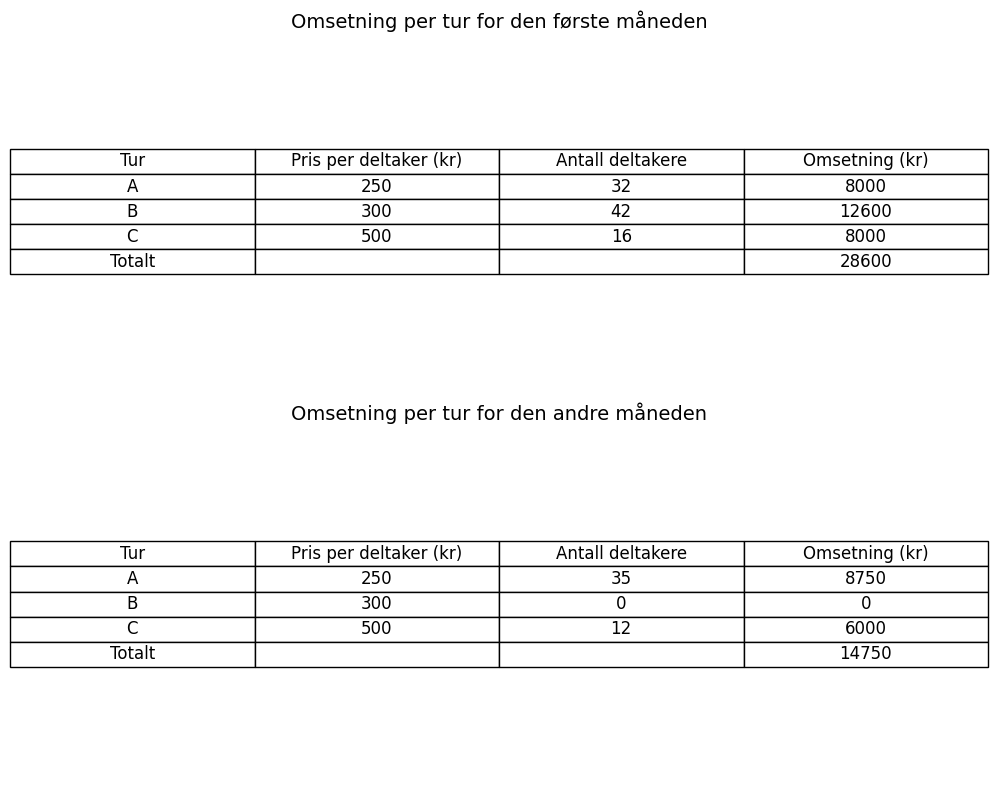

In [4]:
# 2 Personlig økonomi: 2.1 Regneark
import pandas as pd
import matplotlib.pyplot as plt

# Data for den første måneden
data_måned1 = {
    'Tur': ['A', 'B', 'C'],
    'Pris per deltaker (kr)': [250, 300, 500],
    'Antall deltakere': [32, 42, 16]
}

# Data for den andre måneden
data_måned2 = {
    'Tur': ['A', 'B', 'C'],
    'Pris per deltaker (kr)': [250, 300, 500],
    'Antall deltakere': [35, 0, 12]
}

# Opprett DataFrames
df_måned1 = pd.DataFrame(data_måned1)
df_måned2 = pd.DataFrame(data_måned2)

# Beregn omsetning per tur for hver måned
df_måned1['Omsetning (kr)'] = df_måned1['Pris per deltaker (kr)'] * df_måned1['Antall deltakere']
df_måned2['Omsetning (kr)'] = df_måned2['Pris per deltaker (kr)'] * df_måned2['Antall deltakere']

# Beregn total omsetning for hver måned
total_omsetning_måned1 = df_måned1['Omsetning (kr)'].sum()
total_omsetning_måned2 = df_måned2['Omsetning (kr)'].sum()

# Legg til total rad
df_måned1.loc[len(df_måned1)] = ['Totalt', '', '', total_omsetning_måned1]
df_måned2.loc[len(df_måned2)] = ['Totalt', '', '', total_omsetning_måned2]

# Plot tabellene
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Første måned
axs[0].axis('tight')
axs[0].axis('off')
table1 = axs[0].table(cellText=df_måned1.values, colLabels=df_måned1.columns, cellLoc='center', loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1.2, 1.2)
axs[0].set_title('Omsetning per tur for den første måneden', fontsize=14)

# Andre måned
axs[1].axis('tight')
axs[1].axis('off')
table2 = axs[1].table(cellText=df_måned2.values, colLabels=df_måned2.columns, cellLoc='center', loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.scale(1.2, 1.2)
axs[1].set_title('Omsetning per tur for den andre måneden', fontsize=14)

plt.tight_layout()
plt.show()

In [9]:
# 2 Personlig økonomi: 2.2 Lønn og skatt
def eval_input(prompt, allow_exit=False):
    while True:
        user_input = input(prompt)
        if user_input.lower() in ['q', 'quit']:
            print("Avslutter programmet.")
            exit()
        try:
            return float(user_input)
        except ValueError:
            print("Ugyldig input. Prøv igjen." + (" Eller skriv 'q' for å avslutte." if allow_exit else ""))


def velg_lønnstype():
    print("\nVelg lønnstype:")
    print("1. Fast månedslønn")
    print("2. Timelønn")
    print("q. Avslutt")

    lønnstype = input("Ditt valg: ").strip().lower()
    if lønnstype == '1':
        fastlønn = eval_input("Skriv inn fast månedslønn (kr): ", allow_exit=True)
        timelønn = 0
        periode = "måned"
    elif lønnstype == '2':
        timelønn = eval_input("Skriv inn timelønn (kr): ", allow_exit=True)
        periodevalg = input("Hvilken periode gjelder timene for? (1. Uke, 2. Måned, 3. År): ").strip().lower()
        fastlønn = 0
        periode = {"1": "uke", "2": "måned", "3": "år"}.get(periodevalg, "måned")
    elif lønnstype == 'q':
        print("Avslutter programmet.")
        return None, None, None
    else:
        print("Ugyldig valg.")
        return velg_lønnstype()

    return fastlønn, timelønn, periode


def hent_overtid(timelønn):
    tillegg_sum = 0
    detaljer = []

    har_overtid = input("\nHar du jobbet overtid? (j/n): ").strip().lower()
    if har_overtid not in ['j', 'ja']:
        return 0, detaljer

    if timelønn == 0:
        timelønn = eval_input("Skriv inn timelønn (kr) for beregning av overtid: ", allow_exit=True)

    antall = int(eval_input("Hvor mange forskjellige overtidstillegg har du (f.eks. 20%, 50%, 100%)? ", allow_exit=True))
    for i in range(1, antall + 1):
        prosent = eval_input(f"Prosenttillegg for overtidstype {i} (f.eks. 50 for 50%): ", allow_exit=True)
        timer = eval_input(f"Antall timer med {prosent}% tillegg: ", allow_exit=True)
        lønn = timelønn * (1 + prosent / 100) * timer
        tillegg_sum += lønn
        detaljer.append((prosent, timer, lønn))

    return tillegg_sum, detaljer


def beregn_tabellkort(fastlønn):
    nærmeste_100 = int(fastlønn // 100 * 100)
    tabell = {
        25400: 5098, 25500: 5138, 25600: 5177, 25700: 5217, 25800: 5257, 25900: 5296, 
        26000: 5336, 26100: 5376, 26200: 5415, 26300: 5455, 26400: 5495, 26500: 5535, 
        26600: 5574, 26700: 5614, 26800: 5654, 26900: 5693, 27000: 5733, 27100: 5773, 
        27200: 5812, 27300: 5852, 27400: 5892, 27500: 5932, 27600: 5971, 27700: 6011, 
        27800: 6051, 27900: 6090, 28000: 6130, 28100: 6170, 28200: 6210, 28300: 6249, 
        28400: 6289, 28500: 6329, 28600: 6368, 28700: 6408, 28800: 6448, 28900: 6488, 
        29000: 6527, 29100: 6567, 29200: 6607, 29300: 6646, 29400: 6686, 29500: 6726, 
        29600: 6766, 29700: 6805, 29800: 6845, 29900: 6885, 30000: 6924, 30100: 6964, 
        30200: 7004, 30300: 7044, 30400: 7083, 30500: 7123, 30600: 7163, 30700: 7202, 
        30800: 7242, 30900: 7282, 31000: 7321, 31100: 7361, 31200: 7401, 31300: 7441, 
        31400: 7480, 31500: 7520, 31600: 7560, 31700: 7599, 31800: 7639, 31900: 7679, 
        32000: 7718, 32100: 7758, 32200: 7798, 32300: 7838, 32400: 7877, 32500: 7917, 
        32600: 7957, 32700: 7996, 32800: 8036, 32900: 8076, 33000: 8115, 33100: 8155, 
        33200: 8195, 33300: 8235, 33400: 8274, 33500: 8314, 33600: 8354, 33700: 8394, 
        33800: 8433, 33900: 8473, 34000: 8513, 34100: 8552, 34200: 8592, 34300: 8632, 
        34400: 8671, 34500: 8711, 34600: 8751, 34700: 8791, 34800: 8830, 34900: 8870, 
        35000: 8910, 35100: 8949, 35200: 8989, 35300: 9029, 35400: 9069, 35500: 9108, 
        35600: 9148, 35700: 9188, 35800: 9227, 35900: 9267, 36000: 9307, 36100: 9346, 
        36200: 9386, 36300: 9426, 36400: 9466, 36500: 9505, 36600: 9545, 36700: 9585, 
        36800: 9624, 36900: 9664, 37000: 9704, 37100: 9744, 37200: 9783, 37300: 9823, 
        37400: 9863, 37500: 9902, 37600: 9942, 37700: 9982, 37800: 10022, 37900: 10061, 
        38000: 10101, 38100: 10141, 38200: 10180, 38300: 10220, 38400: 10260, 38500: 10300, 
        38600: 10339, 38700: 10379, 38800: 10419, 38900: 10458, 39000: 10498, 39100: 10538, 
        39200: 10577, 39300: 10617, 39400: 10657, 39500: 10697, 39600: 10736, 39700: 10776, 
        39800: 10816, 39900: 10855, 40000: 10895, 40100: 10935, 40200: 10974, 40300: 11014, 
        40400: 11054, 40500: 11094, 40600: 11133, 40700: 11173, 40800: 11213, 40900: 11252, 
        41000: 11292, 41100: 11332, 41200: 11372, 41300: 11411, 41400: 11451, 41500: 11491, 
        41600: 11530, 41700: 11570, 41800: 11610, 41900: 11650, 42000: 11689, 42100: 11729,
    }
    return tabell.get(nærmeste_100, fastlønn * 0.25)


def beregn_prosentkort():
    return eval_input("Skriv inn prosentsats for forskuddstrekk (f.eks. 34): ", allow_exit=True) / 100


def generer_lønnsslipp(fastlønn, tillegg, tillegg_detaljer, skatt_fast, skatt_tillegg, periode, korttype):
    total = fastlønn + tillegg
    netto = total - skatt_fast - skatt_tillegg

    print("\n🧾 Lønnsslipp")
    print("--------------------------------------------------")
    print(f"Lønn beregnet ut fra periode: {periode}")
    
    if fastlønn > 0:
        print(f"Fastlønn: {fastlønn:.2f} kr")
    if tillegg > 0:
        print(f"Tillegg (overtid): {tillegg:.2f} kr")
        for prosent, timer, lønn in tillegg_detaljer:
            print(f"  - {timer} t × {prosent}% → {lønn:.2f} kr")

    print(f"Bruttolønn: {total:.2f} kr")
    print("--------------------------------------------------")

    if korttype == "tabell":
        print(f"Forskuddstrekk (tabellkort): {skatt_fast:.2f} kr")
        print(f"Forskuddstrekk (prosent av tillegg): {skatt_tillegg:.2f} kr")
    elif korttype == "prosent":
        print(f"Forskuddstrekk (prosentkort): {skatt_fast:.2f} kr")
    elif korttype == "frikort":
        print(f"Skatt: {skatt_fast:.2f} kr")

    print("--------------------------------------------------")
    print(f"Netto utbetalt: {netto:.2f} kr\n")


def frikort_behandling():
    fastlønn, timelønn, periode = velg_lønnstype()
    if fastlønn is None:
        return

    if fastlønn == 0:
        antall_timer = eval_input("Hvor mange timer har du jobbet i perioden?: ", allow_exit=True)
        fastlønn = timelønn * antall_timer

    tillegg, tillegg_detaljer = hent_overtid(timelønn)
    total = fastlønn + tillegg
    fribeløp = 55000
    skatt = 0

    if total > fribeløp:
        skatt = (total - fribeløp) * 0.25

    generer_lønnsslipp(fastlønn, tillegg, tillegg_detaljer, skatt, 0, periode, "frikort")


def tabellkort_behandling():
    fastlønn, timelønn, periode = velg_lønnstype()
    if fastlønn is None:
        return

    skatt_fast = beregn_tabellkort(fastlønn)
    tillegg, tillegg_detaljer = hent_overtid(timelønn)

    prosent = beregn_prosentkort()
    skatt_tillegg = tillegg * prosent

    generer_lønnsslipp(fastlønn, tillegg, tillegg_detaljer, skatt_fast, skatt_tillegg, periode, "tabell")


def prosentkort_behandling():
    fastlønn, timelønn, periode = velg_lønnstype()
    if fastlønn is None:
        return

    if fastlønn == 0:
        antall_timer = eval_input("Hvor mange timer har du jobbet i perioden?: ", allow_exit=True)
        fastlønn = timelønn * antall_timer

    tillegg, tillegg_detaljer = hent_overtid(timelønn)
    brutto_total = fastlønn + tillegg
    forskuddstrekk_prosent = eval_input("Skriv inn prosentsats for forskuddstrekk (f.eks. 34): ", allow_exit=True)
    skatt = brutto_total * (forskuddstrekk_prosent / 100)

    generer_lønnsslipp(fastlønn, tillegg, tillegg_detaljer, skatt, 0, periode, "prosent")


def main():
    while True:
        print("\n📌 Hva slags skattekort bruker du?")
        print("1. Frikort")
        print("2. Tabellkort")
        print("3. Prosentkort")
        print("q. Avslutt")
        valg = input("Ditt valg: ").strip().lower()

        if valg == '1':
            frikort_behandling()
        elif valg == '2':
            tabellkort_behandling()
        elif valg == '3':
            prosentkort_behandling()
        elif valg == 'q':
            print("Avslutter programmet.")
            break
        else:
            print("Ugyldig valg. Prøv igjen.")


if __name__ == "__main__":
    main()


📌 Hva slags skattekort bruker du?
1. Frikort
2. Tabellkort
3. Prosentkort
q. Avslutt


Ditt valg:  q


Avslutter programmet.


In [ ]:
# 2 Personlig økonomi: 2.3 Sparing 
# Regel 4. Ny verdi = Opprinnelig verdi * Vekstfaktor^n hvor n er tiden + løsning av en ukjent i formelen = ett tall 
import math

def spør(prompt):
    svar = input(prompt)
    if svar.lower() == 'q':
        print("Du valgte å avslutte programmet.")
        return None
    return svar

def main():
    print("Dette programmet regner ut den nye verdien på et tall som skal øke eller minke med en viss prosent over tid.")
    print("Du kan skrive 'q' når som helst for å avslutte programmet.\n")

    svar = spør("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm': ")
    if svar is None:
        return
    svar = svar.lower()
    while svar not in ['a', 'm']:
        print("Du skrev inn verken 'a' eller 'm'.")
        svar = spør("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm': ")
        if svar is None:
            return
        svar = svar.lower()

    valg = spør("Vil du beregne ny verdi (n), gammel verdi (g), vekstfaktor (v), tid (t) eller løse for en ukjent verdi (x)? ")
    if valg is None:
        return
    valg = valg.lower()

    if valg == "n":
        beregn_ny_verdi(svar)
    elif valg == "g":
        beregn_gammel_verdi(svar)
    elif valg == "v":
        beregn_vekstfaktor(svar)
    elif valg == "t":
        beregn_tid(svar)
    elif valg == "x":
        løs_ukjent(svar)
    else:
        print("Ugyldig valg")

def beregn_ny_verdi(svar):
    tall = spør("Skriv inn den opprinnelige verdien: ")
    if tall is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    tall = float(tall)
    prosent = float(prosent)
    tid = float(tid)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    ny_verdi = tall * (vekstfaktor ** tid)
    print(f"Den nye verdien etter {tid:.2f} år er {ny_verdi:.2f}")

def beregn_gammel_verdi(svar):
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    ny_verdi = float(ny_verdi)
    prosent = float(prosent)
    tid = float(tid)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    gammel_verdi = ny_verdi / (vekstfaktor ** tid)
    print(f"Den opprinnelige verdien var {gammel_verdi:.2f}")

def beregn_vekstfaktor(svar):
    gammel_verdi = spør("Skriv inn den opprinnelige verdien: ")
    if gammel_verdi is None: return
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    gammel_verdi = float(gammel_verdi)
    ny_verdi = float(ny_verdi)
    tid = float(tid)
    
    vekstfaktor = (ny_verdi / gammel_verdi) ** (1 / tid)
    prosent = (vekstfaktor - 1) * 100 if svar == "a" else (1 - vekstfaktor) * 100
    print(f"Vekstfaktoren er {vekstfaktor:.4f}, som tilsvarer en prosentvis endring på {prosent:.2f}%")

def beregn_tid(svar):
    gammel_verdi = spør("Skriv inn den opprinnelige verdien: ")
    if gammel_verdi is None: return
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return

    gammel_verdi = float(gammel_verdi)
    ny_verdi = float(ny_verdi)
    prosent = float(prosent)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    tid = math.log(ny_verdi / gammel_verdi) / math.log(vekstfaktor)
    print(f"Tiden det tar for verdien å endres fra {gammel_verdi:.2f} til {ny_verdi:.2f} er {tid:.2f} år")

def løs_ukjent(svar):
    print("\nSkriv inn verdiene for tre av variablene. Skriv 'x' for den ukjente.")

    prosent_eller_vekst = spør("Vil du bruke prosent (p) eller vekstfaktor (v)? ")
    if prosent_eller_vekst is None:
        return
    prosent_eller_vekst = prosent_eller_vekst.lower()
    while prosent_eller_vekst not in ['p', 'v']:
        prosent_eller_vekst = spør("Ugyldig valg. Skriv 'p' for prosent eller 'v' for vekstfaktor: ")
        if prosent_eller_vekst is None:
            return
        prosent_eller_vekst = prosent_eller_vekst.lower()

    n_verdi = spør("Ny verdi: ")
    if n_verdi is None: return
    g_verdi = spør("Opprinnelig verdi: ")
    if g_verdi is None: return
    faktor_input = spør("Prosent/vekstfaktor: ")
    if faktor_input is None: return
    tid = spør("Tid (år): ")
    if tid is None: return

    try:
        if faktor_input.lower() == 'x':
            faktor_er_ukjent = True
        else:
            faktor_er_ukjent = False
            if prosent_eller_vekst == 'p':
                prosent = float(faktor_input)
                vekstfaktor = 1 + prosent / 100 if svar == 'a' else 1 - prosent / 100
            else:
                vekstfaktor = float(faktor_input)

        if n_verdi.lower() == 'x':
            g = float(g_verdi)
            t = float(tid)
            n = g * (vekstfaktor ** t)
            print(f"Ny verdi = {n:.2f}")
        elif g_verdi.lower() == 'x':
            n = float(n_verdi)
            t = float(tid)
            g = n / (vekstfaktor ** t)
            print(f"Opprinnelig verdi = {g:.2f}")
        elif faktor_er_ukjent:
            n = float(n_verdi)
            g = float(g_verdi)
            t = float(tid)
            vekstfaktor = (n / g) ** (1 / t)
            prosent = (vekstfaktor - 1) * 100 if svar == "a" else (1 - vekstfaktor) * 100
            print(f"Vekstfaktor = {vekstfaktor:.4f} (tilsvarer {prosent:.2f}% {'økning' if svar == 'a' else 'reduksjon'})")
        elif tid.lower() == 'x':
            n = float(n_verdi)
            g = float(g_verdi)
            t = math.log(n / g) / math.log(vekstfaktor)
            print(f"Tid = {t:.2f} år")
        else:
            print("Du må skrive 'x' for én av variablene.")
    except Exception as e:
        print(f"Det oppstod en feil: {e}")

# Start programmet
main()


📊 Velkommen til serielån-kalkulatoren!
(Skriv inn tall, eller trykk 'q' for å avslutte.)



Har du noe du skal kjøpe? (ja/nei):  ja
1. Hva koster det du skal kjøpe? (f.eks. 250000):  250000
2. Hvor mye penger har du i banken i dag? (f.eks. 100000):  100000



💡 Du trenger å låne: 150 000 kr


3. Årlig rente i prosent (f.eks. 4 for 4%):  4
4. Nedbetalingstid i år (f.eks. 5):  5
5. Antall terminer per år (f.eks. 1 eller 12):  1



🔄 Beregner serielån...

  År  Termin    Avdrag    Rente Terminbeløp Kumulativ Rente Kumulativ Avdrag    Restlån
   1       1 30 000 kr 6 000 kr   36 000 kr        6 000 kr        30 000 kr 120 000 kr
   2       2 30 000 kr 4 800 kr   34 800 kr       10 800 kr        60 000 kr  90 000 kr
   3       3 30 000 kr 3 600 kr   33 600 kr       14 400 kr        90 000 kr  60 000 kr
   4       4 30 000 kr 2 400 kr   32 400 kr       16 800 kr       120 000 kr  30 000 kr
   5       5 30 000 kr 1 200 kr   31 200 kr       18 000 kr       150 000 kr       0 kr


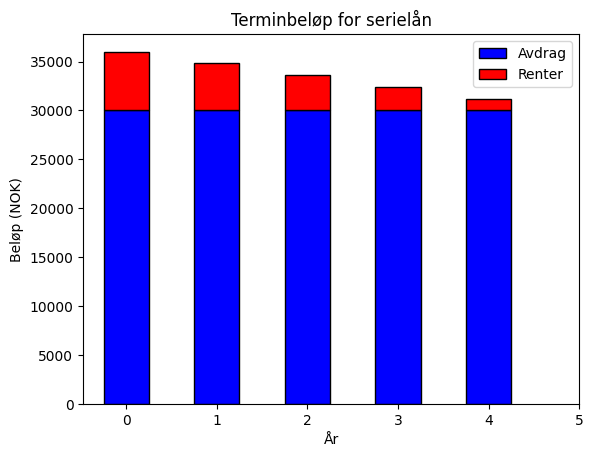


📌 Oppsummering:
- Du låner: 150 000 kr
- Nedbetalingstid: 5 år, med 1 termin(er) per år.
- Totalt betalt i avdrag: 150 000 kr
- Totalt betalt i renter: 18 000 kr
- Totalt betalt til sammen: 168 000 kr

💬 Du betaler altså 168 000 kr totalt over 5 år.


Har du noe du skal kjøpe? (ja/nei):  q


In [12]:
# 2 Personlig økonomi: 2.4 Serielån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_serielån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    antall_perioder = antall_år * antall_perioder_per_år
    terminbeløp_per_periode = lånebeløp / antall_perioder
    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente / antall_perioder_per_år * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for serielån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [a + r for a, r in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum(),
        'Restlån': gjenværende_saldo_liste
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

def hent_input(spørsmål, tillat_formler=True):
    while True:
        verdi = input(spørsmål)
        if verdi.lower() == 'q':
            return 'q'
        try:
            if tillat_formler:
                return float(eval(verdi))
            else:
                return int(verdi)
        except:
            print("Ugyldig input. Prøv igjen eller trykk 'q' for å avslutte.")

def format_beløp(beløp):
    return f"{beløp:,.0f} kr".replace(",", " ")  # Bruk mellomrom som tusenskille

def main():
    print("\n📊 Velkommen til serielån-kalkulatoren!")
    print("(Skriv inn tall, eller trykk 'q' for å avslutte.)\n")

    while True:
        har_kjøp = input("Har du noe du skal kjøpe? (ja/nei): ").strip().lower()
        if har_kjøp == 'q':
            break

        if har_kjøp == 'ja':
            kjøpesum = hent_input("1. Hva koster det du skal kjøpe? (f.eks. 250000): ")
            if kjøpesum == 'q': break

            sparebeløp = hent_input("2. Hvor mye penger har du i banken i dag? (f.eks. 100000): ")
            if sparebeløp == 'q': break

            lånebeløp = kjøpesum - sparebeløp
            if lånebeløp <= 0:
                print("🎉 Du har nok penger og trenger ikke lån!")
                continue

        elif har_kjøp == 'nei':
            sparebeløp = hent_input("1. Hvor mye penger har du i banken i dag? (f.eks. 100000): ")
            if sparebeløp == 'q': break

            ønsket_lån = hent_input("2. Hvor mye ønsker du å låne? (f.eks. 150000): ")
            if ønsket_lån == 'q': break

            lånebeløp = ønsket_lån
        else:
            print("Vennligst svar 'ja' eller 'nei', eller 'q' for å avslutte.\n")
            continue

        print(f"\n💡 Du trenger å låne: {format_beløp(lånebeløp)}")

        rente_prosent = hent_input("3. Årlig rente i prosent (f.eks. 4 for 4%): ")
        if rente_prosent == 'q': break
        rente = rente_prosent / 100

        antall_år = hent_input("4. Nedbetalingstid i år (f.eks. 5): ", tillat_formler=False)
        if antall_år == 'q': break

        antall_perioder = hent_input("5. Antall terminer per år (f.eks. 1 eller 12): ", tillat_formler=False)
        if antall_perioder == 'q': break

        print("\n🔄 Beregner serielån...\n")

        år_liste, termin_liste, betalt_avdrag, betalt_rente, saldo = beregn_serielån(
            lånebeløp, rente, antall_år, antall_perioder)

        df = lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente, saldo)
        print(df.to_string(formatters={
            'Avdrag': lambda x: format_beløp(x),
            'Rente': lambda x: format_beløp(x),
            'Terminbeløp': lambda x: format_beløp(x),
            'Kumulativ Rente': lambda x: format_beløp(x),
            'Kumulativ Avdrag': lambda x: format_beløp(x),
            'Restlån': lambda x: format_beløp(x)
        }))

        plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder)

        total_rente = sum(betalt_rente)
        total_avdrag = sum(betalt_avdrag)
        total_betaling = total_rente + total_avdrag

        print("\n📌 Oppsummering:")
        print(f"- Du låner: {format_beløp(lånebeløp)}")
        print(f"- Nedbetalingstid: {antall_år} år, med {antall_perioder} termin(er) per år.")
        print(f"- Totalt betalt i avdrag: {format_beløp(total_avdrag)}")
        print(f"- Totalt betalt i renter: {format_beløp(total_rente)}")
        print(f"- Totalt betalt til sammen: {format_beløp(total_betaling)}\n")

        print(f"💬 Du betaler altså {format_beløp(total_betaling)} totalt over {antall_år} år.")

if __name__ == "__main__":
    main()


📊 Velkommen til annuitetslån-kalkulatoren!
(Skriv inn tall, eller trykk 'q' for å avslutte.)



Har du noe du skal kjøpe? (ja/nei):  nei
1. Hvor mye penger har du i banken i dag? (f.eks. 100000):  0
2. Hvor mye ønsker du å låne? (f.eks. 150000):  60000



💡 Du trenger å låne: 60 000 kr


3. Årlig rente i prosent (f.eks. 4 for 4%):  5
4. Nedbetalingstid i år (f.eks. 5):  3
5. Antall terminer per år (f.eks. 1 eller 12):  1



🔄 Beregner annuitetslån...

  År  Termin    Avdrag    Rente Terminbeløp Kumulativ Rente Kumulativ Avdrag   Restlån
   1       1 19 033 kr 3 000 kr   22 033 kr        3 000 kr        19 033 kr 40 967 kr
   2       2 19 984 kr 2 048 kr   22 033 kr        5 048 kr        39 017 kr 20 983 kr
   3       3 20 983 kr 1 049 kr   22 033 kr        6 098 kr        60 000 kr      0 kr


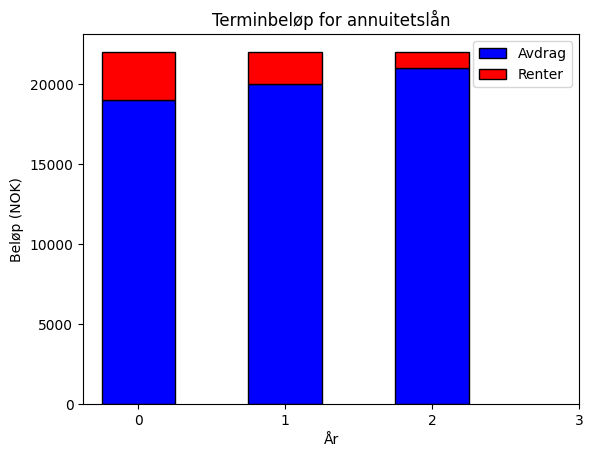


📌 Oppsummering:
- Du låner: 60 000 kr
- Nedbetalingstid: 3 år, med 1 termin(er) per år.
- Totalt betalt i avdrag: 60 000 kr
- Totalt betalt i renter: 6 098 kr
- Totalt betalt til sammen: 66 098 kr

💬 Du betaler altså 66 098 kr totalt over 3 år.


Har du noe du skal kjøpe? (ja/nei):  q


In [13]:
# 2 Personlig økonomi: 2.4 Annuitetslån
import matplotlib.pyplot as plt
import pandas as pd

# Funksjon for beregning av annuitetslån
def beregn_annuitetslån(lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode=None):
    antall_perioder = antall_år * antall_perioder_per_år
    rente_per_periode = rente / antall_perioder_per_år
    
    if terminbeløp_per_periode is None:
        annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / ((1 + rente_per_periode) ** antall_perioder - 1)
        terminbeløp_per_periode = lånebeløp * annuitetsfaktor

    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente_per_periode * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode - betalt_rente_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

# Funksjon for plotting av annuitetslån
def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for annuitetslån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

# Funksjon for å lage lånedataframe med restlån
def lag_lånedataframe_annuitetslån(år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [a + r for a, r in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum(),
        'Restlån': gjenværende_saldo_liste
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Funksjon for input med håndtering av feil
def hent_input(spørsmål, tillat_formler=True):
    while True:
        verdi = input(spørsmål)
        if verdi.lower() == 'q':
            return 'q'
        try:
            if tillat_formler:
                return float(eval(verdi))
            else:
                return int(verdi)
        except:
            print("Ugyldig input. Prøv igjen eller trykk 'q' for å avslutte.")

# Funksjon for å formatere beløp i kr
def format_beløp(beløp):
    return f"{beløp:,.0f} kr".replace(",", " ")  # Bruk mellomrom som tusenskille

# Hovedfunksjon for programmet
def main():
    print("\n📊 Velkommen til annuitetslån-kalkulatoren!")
    print("(Skriv inn tall, eller trykk 'q' for å avslutte.)\n")

    while True:
        har_kjøp = input("Har du noe du skal kjøpe? (ja/nei): ").strip().lower()
        if har_kjøp == 'q':
            break

        if har_kjøp == 'ja':
            kjøpesum = hent_input("1. Hva koster det du skal kjøpe? (f.eks. 250000): ")
            if kjøpesum == 'q': break

            sparebeløp = hent_input("2. Hvor mye penger har du i banken i dag? (f.eks. 100000): ")
            if sparebeløp == 'q': break

            lånebeløp = kjøpesum - sparebeløp
            if lånebeløp <= 0:
                print("🎉 Du har nok penger og trenger ikke lån!")
                continue

        elif har_kjøp == 'nei':
            sparebeløp = hent_input("1. Hvor mye penger har du i banken i dag? (f.eks. 100000): ")
            if sparebeløp == 'q': break

            ønsket_lån = hent_input("2. Hvor mye ønsker du å låne? (f.eks. 150000): ")
            if ønsket_lån == 'q': break

            lånebeløp = ønsket_lån
        else:
            print("Vennligst svar 'ja' eller 'nei', eller 'q' for å avslutte.\n")
            continue

        print(f"\n💡 Du trenger å låne: {format_beløp(lånebeløp)}")

        rente_prosent = hent_input("3. Årlig rente i prosent (f.eks. 4 for 4%): ")
        if rente_prosent == 'q': break
        rente = rente_prosent / 100

        antall_år = hent_input("4. Nedbetalingstid i år (f.eks. 5): ", tillat_formler=False)
        if antall_år == 'q': break

        antall_perioder = hent_input("5. Antall terminer per år (f.eks. 1 eller 12): ", tillat_formler=False)
        if antall_perioder == 'q': break

        print("\n🔄 Beregner annuitetslån...\n")

        år_liste, termin_liste, betalt_avdrag, betalt_rente, saldo = beregn_annuitetslån(
            lånebeløp, rente, antall_år, antall_perioder)

        df = lag_lånedataframe_annuitetslån(år_liste, termin_liste, betalt_avdrag, betalt_rente, saldo)
        print(df.to_string(formatters={
            'Avdrag': lambda x: format_beløp(x),
            'Rente': lambda x: format_beløp(x),
            'Terminbeløp': lambda x: format_beløp(x),
            'Kumulativ Rente': lambda x: format_beløp(x),
            'Kumulativ Avdrag': lambda x: format_beløp(x),
            'Restlån': lambda x: format_beløp(x)
        }))

        plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder)

        total_rente = sum(betalt_rente)
        total_avdrag = sum(betalt_avdrag)
        total_betaling = total_rente + total_avdrag

        print("\n📌 Oppsummering:")
        print(f"- Du låner: {format_beløp(lånebeløp)}")
        print(f"- Nedbetalingstid: {antall_år} år, med {antall_perioder} termin(er) per år.")
        print(f"- Totalt betalt i avdrag: {format_beløp(total_avdrag)}")
        print(f"- Totalt betalt i renter: {format_beløp(total_rente)}")
        print(f"- Totalt betalt til sammen: {format_beløp(total_betaling)}\n")

        print(f"💬 Du betaler altså {format_beløp(total_betaling)} totalt over {antall_år} år.")

if __name__ == "__main__":
    main()

# $\color{blue}{\text{Kapittel 3 - Formler}}$

# $\color{green}{\text{Kapittel 4 - Statistikk}}$

# $\color{red}{\text{Kapittel 5 - Yrkesøkonomi}}$

In [2]:
# 5 Yrkesøkonomi: 5.2 Merverdiavgift
# 5.2 Merverdiavgift beregning: Pris uten MVA = Pris med MVA/Vekstfaktoren 
def beregn_pris_uten_mva(pris_med_mva, vekstfaktor):
    return pris_med_mva / vekstfaktor

def beregn_pris_med_mva(pris_uten_mva, vekstfaktor):
    return pris_uten_mva * vekstfaktor

def beregn_vekstfaktor(pris_med_mva, pris_uten_mva):
    return pris_med_mva / pris_uten_mva

def velg_vekstfaktor():
    print("Velg MVA-sats:")
    print("1. 25% (For de fleste varer eller tjenester)")
    print("2. 15% (For mat og drikke)")
    print("3. 12% (For persontransport, kinobilletter og utleie av rom)")
    print("4. 0% (Helsetjenester, undervisningstjenester og kulturelle tjenester)")
    
    valg = input("Velg et alternativ (1/2/3/4): ").strip()
    if valg == '1':
        return 1.25
    elif valg == '2':
        return 1.15
    elif valg == '3':
        return 1.12
    elif valg == '4':
        return 1.00
    else:
        print("Ugyldig valg. Standard vekstfaktor 1.25 (25%) brukes.")
        return 1.25

def hovedprogram():
    while True:
        print("\nVelkommen til MVA kalkulator!")
        print("Trykk 'q' for å avslutte programmet.\n")
       
        print("Velg en beregning:")
        print("1. Pris uten MVA")
        print("2. Pris med MVA")
        print("3. Vekstfaktoren")

        choice = input("Velg et alternativ (1/2/3/q): ").strip().lower()
        if choice == 'q':
            print("Programmet avsluttes.")
            break

        try:
            if choice == '1':
                pris_med_mva = float(input("\nOppgi prisen med MVA: "))
                vekstfaktor = velg_vekstfaktor()
                pris_uten_mva = beregn_pris_uten_mva(pris_med_mva, vekstfaktor)
                resultat = f"\nPrisen uten MVA er {round(pris_uten_mva, 2)}"
            elif choice == '2':
                pris_uten_mva = float(input("\nOppgi prisen uten MVA: "))
                vekstfaktor = velg_vekstfaktor()
                pris_med_mva = beregn_pris_med_mva(pris_uten_mva, vekstfaktor)
                mva_belop = pris_med_mva - pris_uten_mva
                resultat = (
                    f"\nPrisen med MVA er {round(pris_med_mva, 2)}"
                    f"\nMerverdiavgiften utgjør {round(mva_belop, 2)}"
                )
            elif choice == '3':
                pris_med_mva = float(input("\nOppgi prisen med MVA: "))
                pris_uten_mva = float(input("Oppgi prisen uten MVA: "))
                vekstfaktor = beregn_vekstfaktor(pris_med_mva, pris_uten_mva)
                resultat = f"\nVekstfaktoren er {round(vekstfaktor, 2)}"
            else:
                resultat = "\nUgyldig valg. Vennligst oppgi 1, 2 eller 3."
        except ValueError:
            resultat = "\nUgyldig inndata. Vennligst oppgi et tall."

        print(resultat)

if __name__ == "__main__":
    hovedprogram()


Velkommen til MVA kalkulator!
Trykk 'q' for å avslutte programmet.

Velg en beregning:
1. Pris uten MVA
2. Pris med MVA
3. Vekstfaktoren


Velg et alternativ (1/2/3/q):  q


Programmet avsluttes.


In [1]:
# 5 Yrkesøkonomi: 5.3 Priskalkyler
# Priskalkyle Oppgave 7.133a:

materialkostnad_per_kort = 23         # Pris per takkekort
antall_kort = 20                       # Antall takkekort kunden ønsker
indirekte_kostnader = 1100            # Faste kostnader som strøm, husleie osv.
fortjeneste_prosent = 0.41            # Ønsket fortjeneste (41 %)
mva = 0.25                             # Merverdiavgift (25 %)

# Lønnskostnader
timelønn = 350                         # Grunnlønn per time
overtidssats = timelønn * 1.25         # Overtidstillegg (25 % ekstra)
timer_fotografering = 3               # Antall timer brukt på fotografering
timer_redigering = 5                  # Antall timer brukt på redigering og etterarbeid

# Beregner lønnskostnader
lønn_fotografering = timer_fotografering * overtidssats
lønn_redigering = timer_redigering * timelønn
total_lønn = lønn_fotografering + lønn_redigering

# Beregner materialkostnader
total_materialkostnad = materialkostnad_per_kort * antall_kort

# Beregner selvkost (alle kostnader før fortjeneste og mva)
selvkost = total_materialkostnad + total_lønn + indirekte_kostnader

# Legger til fortjeneste
pris_med_fortjeneste = selvkost * (1 + fortjeneste_prosent)

# Legger til merverdiavgift
sluttpris = pris_med_fortjeneste * (1 + mva)

# Skriver ut en oversikt over alle kostnader og sluttpris
print("Kostnadsoversikt:")
print(f"Materialkostnader: {total_materialkostnad} kr")
print(f"Lønnskostnader: {total_lønn} kr")
print(f"Indirekte kostnader: {indirekte_kostnader} kr")
print(f"Selvkost: {selvkost} kr")
print(f"Pris med fortjeneste: {pris_med_fortjeneste:.2f} kr")
print(f"Sluttpris inkl. mva: {round(sluttpris)} kr")

Kostnadsoversikt:
Materialkostnader: 460 kr
Lønnskostnader: 3062.5 kr
Indirekte kostnader: 1100 kr
Selvkost: 4622.5 kr
Pris med fortjeneste: 6517.72 kr
Sluttpris inkl. mva: 8147 kr


In [23]:
# 5 Yrkesøkonomi: 5.3 Priskalkyler
import re

# Evaluerer trygge matematiske uttrykk
def evaluer_uttrykk(uttrykk):
    uttrykk = uttrykk.replace(' ', '')
    if re.match(r'^[0-9\.\*\+\-/()]+$', uttrykk):
        return eval(uttrykk)
    else:
        raise ValueError("Ugyldig uttrykk")

# Henter og validerer kostnader og lønn
def hent_kostnader():
    print("\nOppgi kostnader – (skriv 'q' for å avslutte):")
    while True:
        try:
            direkte_input = input("Direkte kostnader/Materialkostnader (uten mva.) (feks råvarer): ").strip().lower()
            if direkte_input == 'q':
                return None
            direkte = evaluer_uttrykk(direkte_input)
            if direkte < 0:
                raise ValueError

            indirekte_input = input("Indirekte kostnader (feks husleie, strøm): ").strip().lower()
            if indirekte_input == 'q':
                return None
            indirekte = evaluer_uttrykk(indirekte_input)
            if indirekte < 0:
                raise ValueError

            # NYTT: Velg metode for lønnskostnader
            print("\nVil du oppgi lønnskostnader direkte, eller beregne dem?")
            lønn_valg = input("Skriv 'j' for å oppgi direkte lønnskostnader, eller 'n' for å beregne ut fra timelønn og minutter brukt: ").strip().lower()
            if lønn_valg == 'q':
                return None

            if lønn_valg == 'j':
                lønn_input = input("Oppgi lønnskostnader direkte (kr): ").strip().lower()
                if lønn_input == 'q':
                    return None
                lønn = evaluer_uttrykk(lønn_input)
                if lønn < 0:
                    raise ValueError

            elif lønn_valg == 'n':
                timelønn_input = input("Oppgi timelønn (kr/t): ").strip().lower()
                if timelønn_input == 'q':
                    return None
                timelønn = evaluer_uttrykk(timelønn_input)
                if timelønn < 0:
                    raise ValueError

                minutter_input = input("Hvor mange minutter er brukt av timen til arbeidet? ").strip().lower()
                if minutter_input == 'q':
                    return None
                minutter = evaluer_uttrykk(minutter_input)
                if minutter < 0:
                    raise ValueError

                lønn = timelønn * (minutter / 60)

            else:
                print("Ugyldig valg. Skriv 'j' for ja, 'n' for nei, eller 'q' for å avslutte.")
                continue

            return direkte + indirekte + lønn

        except ValueError:
            print("Ugyldig inndata. Vennligst oppgi et gyldig POSITIVT tall eller uttrykk – eller 'q' for å avslutte.")


def velg_vekstfaktor():
    print("\nVelg MVA-sats (skriv 'q' for å avslutte):")
    print("1. 25% (For de fleste varer eller tjenester)")
    print("2. 15% (Næringsmidler, altså mat og drikke)")
    print("3. 12% (For persontransport, kinobilletter, Inngangsbilletter til museer, gallerier, o.l., overnatting og utleie av rom)")
    print("4. 0% (Helsetjenester, undervisningstjenester og kulturelle tjenester)")
    
    while True:
        valg = input("Velg et alternativ (1/2/3/4): ").strip().lower()
        if valg == 'q':
            return None
        vekstfaktorer = {
            '1': 1.25,
            '2': 1.15,
            '3': 1.12,
            '4': 1.00
        }
        if valg in vekstfaktorer:
            return vekstfaktorer[valg]
        else:
            print("Ugyldig valg. Velg 1, 2, 3 eller 4 – eller 'q' for å avslutte.")

def beregn_pris():
    selvkost = hent_kostnader()
    if selvkost is None:
        print("\nAvslutter programmet. Takk for at du brukte priskalkulatoren!")
        return True  # signaliser at programmet skal avsluttes

    # Hvis selvkost er 0, gi mulighet til å skrive det inn manuelt
    if selvkost == 0:
        svar = input("\nSelvkost er 0 kr. Vil du skrive inn en selvkost manuelt? (j/n): ").strip().lower()
        if svar == 'j':
            while True:
                manuelt_input = input("Oppgi ønsket selvkost (kr): ").strip().lower()
                if manuelt_input == 'q':
                    print("Avslutter beregningen. Takk for at du brukte priskalkulatoren!")
                    return True
                try:
                    manuelt_beløp = evaluer_uttrykk(manuelt_input)
                    if manuelt_beløp > 0:
                        selvkost = manuelt_beløp
                        break
                    else:
                        print("Selvkost må være et positivt tall.")
                except ValueError:
                    print("Ugyldig verdi. Prøv igjen.")
        else:
            print("Avslutter beregningen. Takk for at du brukte priskalkulatoren!")
            return True

    # Spør om bruker vil gå videre
    svar = input(f"\nSelvkost er beregnet til {selvkost:.2f} kr. Vil du gå videre og legge til fortjeneste? (j/n): ").strip().lower()
    if svar != 'j':
        print("Avslutter beregningen. Takk for at du brukte priskalkulatoren!")
        return True

    while True:
        try:
            fortjeneste_input = input("\nØnsket fortjeneste i prosent (%): ").strip().lower()
            if fortjeneste_input == 'q':
                print("\nAvslutter programmet. Takk for at du brukte priskalkulatoren!")
                return True
            fortjeneste_prosent = evaluer_uttrykk(fortjeneste_input)
            if fortjeneste_prosent < 0:
                print("Fortjenesteprosent kan ikke være negativ.")
                continue
            break
        except ValueError:
            print("Ugyldig inndata. Vennligst oppgi et positivt tall eller 'q' for å avslutte.")

    fortjeneste = selvkost * (fortjeneste_prosent / 100)
    pris_uten_mva = selvkost + fortjeneste

    vekstfaktor = velg_vekstfaktor()
    if vekstfaktor is None:
        print("\nAvslutter programmet. Takk for at du brukte priskalkulatoren!")
        return True

    pris_med_mva = pris_uten_mva * vekstfaktor
    mva_beløp = pris_med_mva - pris_uten_mva

    print("\n--- Priskalkyle ---")
    print(f"Summen av kostnader/selvkosten er: {selvkost:.2f} kr")
    print(f"Fortjenesten i ({fortjeneste_prosent}%) er: {fortjeneste:.2f} kr")
    print(f"Prisen uten merverdiavgift er: {pris_uten_mva:.2f} kr")
    print(f"Merverdiavgiften er: {mva_beløp:.2f} kr")
    print(f"Prisen med merverdiavgift er: {pris_med_mva:.2f} kr")

    return False  # fortsett programmet

def hovedmeny():
    avslutt = False
    while not avslutt:
        avslutt = beregn_pris()
        if not avslutt:
            while True:
                igjen = input("\nVil du gjøre en ny beregning? (j = ja / q = avslutt): ").strip().lower()
                if igjen == 'j':
                    break
                elif igjen == 'q':
                    print("Takk for at du brukte priskalkulatoren!")
                    avslutt = True
                    break
                else:
                    print("Ugyldig valg. Skriv 'j' for ja eller 'q' for avslutt.")

# Start programmet
hovedmeny()


Oppgi kostnader – (skriv 'q' for å avslutte):


Direkte kostnader/Materialkostnader (uten mva.) (feks råvarer):  83102
Indirekte kostnader (feks husleie, strøm):  32200



Vil du oppgi lønnskostnader direkte, eller beregne dem?


Skriv 'j' for å oppgi direkte lønnskostnader, eller 'n' for å beregne ut fra timelønn og minutter brukt:  j
Oppgi lønnskostnader direkte (kr):  96630

Selvkost er beregnet til 211932.00 kr. Vil du gå videre og legge til fortjeneste? (j/n):  j

Ønsket fortjeneste i prosent (%):  80



Velg MVA-sats (skriv 'q' for å avslutte):
1. 25% (For de fleste varer eller tjenester)
2. 15% (Næringsmidler, altså mat og drikke)
3. 12% (For persontransport, kinobilletter, Inngangsbilletter til museer, gallerier, o.l., overnatting og utleie av rom)
4. 0% (Helsetjenester, undervisningstjenester og kulturelle tjenester)


Velg et alternativ (1/2/3/4):  1



--- Priskalkyle ---
Summen av kostnader/selvkosten er: 211932.00 kr
Fortjenesten i (80%) er: 169545.60 kr
Prisen uten merverdiavgift er: 381477.60 kr
Merverdiavgiften er: 95369.40 kr
Prisen med merverdiavgift er: 476847.00 kr



Vil du gjøre en ny beregning? (j = ja / q = avslutt):  q


Takk for at du brukte priskalkulatoren!


In [ ]:
# 5 Yrkesøkonomi: 5.5 Anbud
def calculate_bid():
    while True:
        print("\n--- Anbudsberegning ---")
        avslutt = input("Trykk 'q' for å avslutte eller Enter for å fortsette: ")
        if avslutt.lower() == 'q':
            print("Programmet er avsluttet.")
            break

        try:
            innkjopssum_uten_mva = eval(input("Innkjøpssum uten mva (f.eks. 5*100): "))
            fortjeneste_prosent = eval(input("Fortjeneste i prosent (f.eks. 80): "))
            lonnskostnader = eval(input("Lønnskostnader (f.eks. 10*500): "))
            mva_sats = eval(input("Merverdiavgift i prosent (f.eks. 25): "))

            fortjeneste = innkjopssum_uten_mva * (fortjeneste_prosent / 100)
            utsalgssum = innkjopssum_uten_mva + fortjeneste
            pris_uten_mva = utsalgssum + lonnskostnader
            mva_belop = pris_uten_mva * (mva_sats / 100)
            pris_med_mva = pris_uten_mva + mva_belop
            inntekt_til_bedriften = pris_uten_mva - innkjopssum_uten_mva

            print("\n--- Resultat ---")
            print(f"Utsalgssum (materialer, råvarer): {utsalgssum:.2f} kr")
            print(f"Pris uten merverdiavgift: {pris_uten_mva:.2f} kr")
            print(f"Merverdiavgift: {mva_belop:.2f} kr")
            print(f"Pris med merverdiavgift: {pris_med_mva:.2f} kr")
            print(f"Inntekten til bedriften: {inntekt_til_bedriften:.2f} kr")

            print("\nUlemper med for lavt anbud:")
            print("- Risiko for underskudd")
            print("- Manglende dekning av uforutsette kostnader")
            print("- Redusert kvalitet på arbeidet")

            print("\nUlemper med for høyt anbud:")
            print("- Risiko for å miste kunden")
            print("- Redusert konkurranseevne")
            print("- Oppfattes som overpriset")

        except Exception as e:
            print(f"Feil i input: {e}. Prøv igjen.")

# Kjør funksjonen i en celle i Jupyter Notebook
calculate_bid()